In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os, gc
# os.listdir()


In [2]:
train_df = pd.read_csv('store_data/train_df_save3.csv')
test_df  = pd.read_csv('store_data/test_df_save3.csv')
sub      = pd.read_csv('sample_submission_24jSKY6.csv')
info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')

train_df.shape, test_df.shape

((224607, 142), (112392, 141))

In [3]:
uncor_cols = ['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID','manufac1_max',
'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'Driving_flag','Passport_flag', 
'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
'SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
'PRIMARY.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS','day_of_birth','month_of_birth',
'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','year_of_birth', 'credit_hist_year','manufac1_min'
'credit_hist_month','day_of_disbursal', 'month_of_disbursal', 'no_of_acc_overdue',
'no_of_inquiry', 'branch1_min', 'branch1_max', 'branch1_sum','branch2_min', 'state1_max',
'emp_code1_min', 'emp_code1_sum','emp_code1_get_skew', 'emp_code2_min', 'pincode1_max'
'emp_code2_get_skew','pincode1_min', 'pincode1_sum', 'pincode2_get_skew']
drop_cols = set(train_df.columns) - set(uncor_cols)
len(drop_cols)

96

In [5]:
drop_cols.remove('UniqueID')
drop_cols.remove('loan_default')
len(drop_cols)

KeyError: 'UniqueID'

In [6]:
cols_for_pca = [col for col in list(drop_cols) if col.startswith('branch') or \
                col.startswith('state') or col.startswith('emp_code') or \
                col.startswith('manufac') or col.startswith('pincode')]
print(len(cols_for_pca))
pca_tr = train_df[cols_for_pca]
pca_ts = test_df[cols_for_pca]
pca_tr.shape, pca_ts.shape

77


((224607, 77), (112392, 77))

In [13]:
# count_gps = pca_tr.apply(lambda x: pd.Series.value_counts(x).shape[0])
# pca_tr.apply(lambda x: pd.Series.value_counts(x).shape[0]).sort_values().head(50)

In [22]:
pca_tr.apply(lambda x: pd.Series.value_counts(x).shape[0]).sort_values().tail(50)

state2_get_skew           22
state2_get_unique         22
state2_count              22
state1_get_skew           22
state1_sum                22
state2_mean               22
state1_mad                22
branch2_max               60
branch2_get_unique        79
branch2_count             81
branch1_count             81
branch1_mean              82
branch2_mean              82
branch1_get_skew          82
branch2_mad               82
branch2_sum               82
branch1_std               82
branch1_get_unique        82
branch2_std               82
branch2_get_skew          82
branch1_mad               82
emp_code1_get_unique     180
emp_code2_get_unique     191
pincode1_get_unique      248
pincode2_get_unique      253
emp_code1_count          257
emp_code2_count          257
pincode2_count           317
pincode1_count           317
emp_code2_max           1315
pincode2_max            2355
pincode2_min            2620
emp_code1_max           2906
emp_code2_get_skew      3146
emp_code1_mad 

In [7]:
int_cols = [col for col in pca_tr.columns if col.startswith('pincode') or \
            col.startswith('emp_code')]

cat_cols = [col for col in pca_tr.columns if not col.startswith('pincode')]
cat_cols = [col for col in cat_cols if not col.startswith('emp_code')]

len(int_cols), len(cat_cols)

(29, 48)

In [42]:
# for col in cat_cols:
#     print(col, pca_tr[col].unique())

In [10]:
# df.T.drop_duplicates()
# tp = pca_tr.T.drop_duplicates().T
pca_tr.drop(['state1_count','branch1_count','manufac2_count'], axis=1, inplace=True)
pca_ts.drop(['state1_count','branch1_count','manufac2_count'], axis=1, inplace=True)


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

pca_tr.fillna(0, inplace=True)
pca_ts.fillna(0, inplace=True)

for col in cat_cols:
    try:
        le.fit(list(pca_tr[col]) + list(pca_ts[col]))
        pca_tr[col] = le.transform(pca_tr[col])
        pca_ts[col] = le.transform(pca_ts[col])
    except:
        print(col)
        cat_cols.remove(col)


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

state1_count
branch1_count
manufac2_count


In [111]:
for col in cat_cols:
    print(col.ljust(30), end=" ")
    print(train_df[col].unique().shape[0], end=" ")
    print(test_df[col].unique().shape[0], "==>", end=" ")
    print(len(set(train_df[col].unique()).intersection(set(test_df[col].unique()))))

state2_get_skew                

KeyError: 'state2_get_skew'

In [33]:
pca_cat = pd.get_dummies(pd.concat([pca_tr[cat_cols], pca_ts[cat_cols]], axis=0), 
                         columns=cat_cols, drop_first=True)
pca_cat.shape

(336999, 2960)

In [34]:
pca_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336999 entries, 0 to 112391
Columns: 2960 entries, state2_get_skew_1 to state2_sum_43
dtypes: uint8(2960)
memory usage: 953.9 MB


In [43]:
tp_save = []
sing_values = []
from sklearn.decomposition import TruncatedSVD

columns_shuffle = np.random.permutation(pca_cat.shape[1])
for i in range(20):
    print(i+1)
    select_cols = columns_shuffle[150*i:150*(i+1)]
#     print(pca_cat.iloc[:,select_cols].shape)
    svd = TruncatedSVD(n_components=3)
    tp = svd.fit_transform(pca_cat.iloc[:,select_cols])
    tp_save.append(tp)
    sing_values.append(svd.singular_values_)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [56]:
del pca_cat
gc.collect()

41734

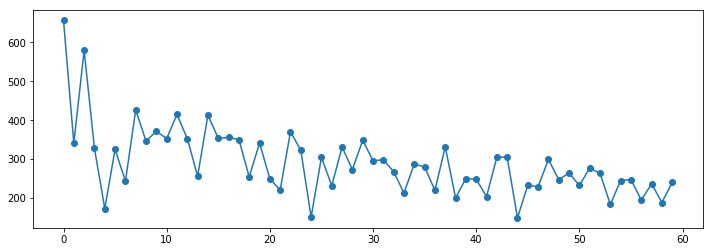

In [54]:
plt.figure(figsize=(12,4))
plt.plot(np.column_stack(sing_values).reshape(-1,),'-o')

In [55]:
tp_save = np.column_stack(tp_save)
tp_save.shape

(336999, 60)

In [58]:
from sklearn.preprocessing import StandardScaler

stdc = StandardScaler()
pca_int = pd.concat([pca_tr[int_cols], pca_ts[int_cols]], axis=0)
print(pca_int.shape)
pca_int = stdc.fit_transform(pca_int)
pca_int.shape

(336999, 29)


(336999, 29)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans = pca.fit_transform(pca_int)


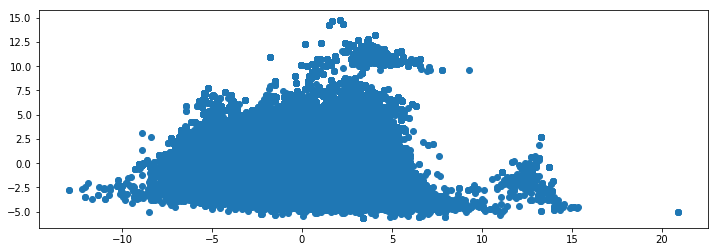

In [61]:
plt.figure(figsize=(12,4))
plt.scatter(pca_trans[:,0],pca_trans[:,1])

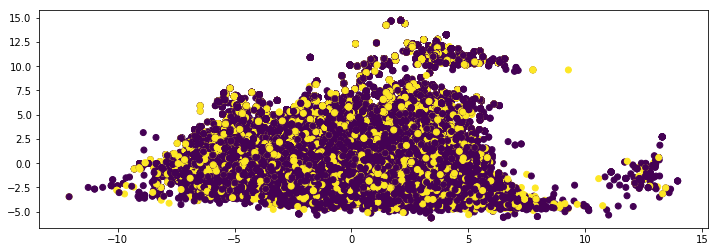

In [62]:
plt.figure(figsize=(12,4))
plt.scatter(pca_trans[:train_df.shape[0],0],pca_trans[:train_df.shape[0],1], 
            c=train_df.loan_default)

In [128]:
from sklearn.manifold import TSNE
# tsne30 = TSNE(n_components=2, perplexity=30).fit_transform(pca_int)

# plt.figure(figsize=(12,4))
# plt.scatter(tsne[:train_df.shape[0],0],tsne[:train_df.shape[0],1], 
#             c=train_df.loan_default)
pca_int.shape

(336999, 29)

In [129]:
tsne30 = TSNE(n_components=2, perplexity=30).fit_transform(pca_int)


In [130]:
tsne60 = TSNE(n_components=2, perplexity=60).fit_transform(pca_int)


In [131]:
tsne90 = TSNE(n_components=2, perplexity=90).fit_transform(pca_int)


In [132]:
tsne120 = TSNE(n_components=2, perplexity=120).fit_transform(pca_int)


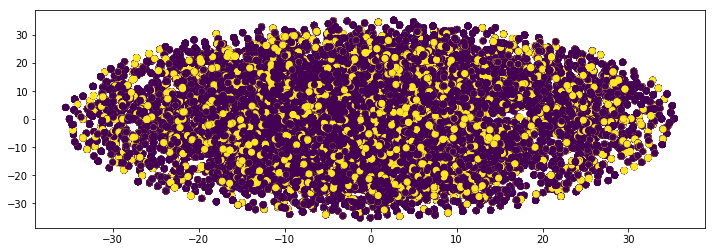

In [134]:
plt.figure(figsize=(12,4))
plt.scatter(tsne30[:train_df.shape[0],0],tsne30[:train_df.shape[0],1], 
            c=train_df.loan_default)

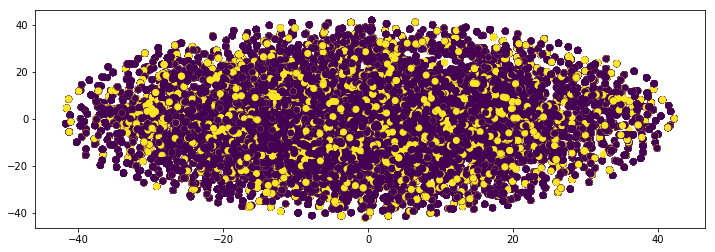

In [135]:
plt.figure(figsize=(12,4))
plt.scatter(tsne60[:train_df.shape[0],0],tsne60[:train_df.shape[0],1], 
            c=train_df.loan_default)


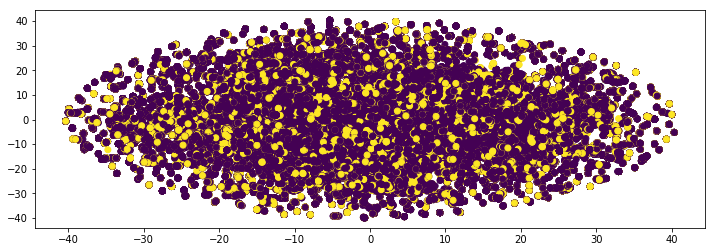

In [136]:
plt.figure(figsize=(12,4))
plt.scatter(tsne90[:train_df.shape[0],0],tsne90[:train_df.shape[0],1], 
            c=train_df.loan_default)

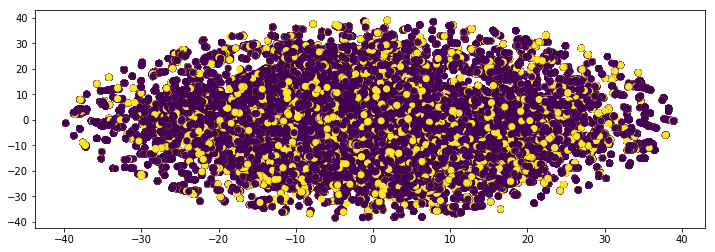

In [137]:
plt.figure(figsize=(12,4))
plt.scatter(tsne120[:train_df.shape[0],0],tsne120[:train_df.shape[0],1], 
            c=train_df.loan_default)

In [140]:
from scipy.stats import pearsonr

pearsonr(tsne60[:,0], tsne90[:,0]), pearsonr(tsne60[:,1], tsne90[:,1]),\
pearsonr(tsne120[:,0], tsne90[:,0]), pearsonr(tsne120[:,1], tsne90[:,1])

((-0.1510087, 0.0),
 (0.034014754, 7.747663558348483e-87),
 (0.008772167, 3.5344000561263223e-07),
 (0.037765794, 1.3036911540599235e-106))

In [67]:
# danger_cols = [drop_cols.remove(col) for col in int_cols+cat_cols]
len(danger_cols), len(int_cols+cat_cols)

(74, 74)

In [74]:
pca = PCA(n_components=6)
pca_trans = pca.fit_transform(pca_int)
pca_trans.shape

(336999, 6)

In [75]:
svd_data = pd.DataFrame(data=tp_save)
svd_data.columns = ['svd_'+str(i) for i in range(svd_data.shape[1])]

pca_data = pd.DataFrame(data=pca_trans)
pca_data.columns = ['pca_'+str(i) for i in range(pca_data.shape[1])]

svd_data.shape, pca_data.shape

# tsne_data = pd.DataFrame(data=tsne)
# tsne_data.columns = ['tsne_'+str(i) for i in range(tsne_data.shape[1])]

# svd_data.shape, pca_data.shape, tsne_data.shape

((336999, 60), (336999, 6))

In [89]:
svd_pca = pd.concat([svd_data, pca_data], axis=1)
train_df = pd.concat([train_df, 
                      svd_pca.iloc[:train_df.shape[0],:].reset_index(drop=True)], 
                     axis=1)
test_df = pd.concat([test_df, 
                     svd_pca.iloc[train_df.shape[0]:,:].reset_index(drop=True)], 
                    axis=1)

train_df.shape, test_df.shape

((224607, 208), (112392, 207))

In [90]:
train_df_save = train_df.copy()
test_df_save  = test_df.copy()

train_df.drop(int_cols, axis=1, inplace=True)
test_df.drop(int_cols, axis=1, inplace=True)

train_df.drop(cat_cols, axis=1, inplace=True)
test_df.drop(cat_cols, axis=1, inplace=True)

train_df_save.shape, test_df_save.shape, train_df.shape, test_df.shape

((224607, 208), (112392, 207), (224607, 134), (112392, 133))

In [92]:
count_gps = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
count_gps[count_gps.values < 50]

manufacturer_id                        11
Employment.Type                         2
State_ID                               22
Aadhar_flag                             2
PAN_flag                                2
VoterID_flag                            2
Driving_flag                            2
Passport_flag                           2
SEC.NO.OF.ACCTS                         2
SEC.ACTIVE.ACCTS                        2
SEC.OVERDUE.ACCTS                       2
SEC.INSTAL.AMT                          2
NEW.ACCTS.IN.LAST.SIX.MONTHS            3
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     3
loan_default                            2
day_of_birth                           31
month_of_birth                         12
year_of_birth                          48
credit_hist_year                        6
credit_hist_month                      12
loan_tenure_year                        6
loan_tenure_month                      12
day_of_disbursal                       22
month_of_disbursal                

In [94]:
intersting_cols = list(count_gps[count_gps.values < 30].index)
len(intersting_cols)

37

In [95]:
del pca_trans, tp_save, svd_data, pca_data
gc.collect()

7646

In [145]:
train_df_save.shape, test_df_save.shape, train_df.shape, test_df.shape

((224607, 208), (112392, 207), (224607, 134), (112392, 133))

In [143]:
tsne30 = pd.DataFrame(tsne30, columns=['tsne30_1', 'tsne30_2'])
tsne60 = pd.DataFrame(tsne60, columns=['tsne60_1', 'tsne60_2'])
tsne90 = pd.DataFrame(tsne90, columns=['tsne90_1', 'tsne90_2'])
tsne120 = pd.DataFrame(tsne120, columns=['tsne120_1', 'tsne120_2'])

tsne_data = pd.concat([tsne30, tsne60, tsne90, tsne120], axis=1)
tsne_data.shape

(336999, 8)

In [146]:
print(train_df_save.shape, test_df_save.shape, "==>", end=" ")
train_df_save = pd.concat([train_df_save, 
                      tsne_data.iloc[:train_df_save.shape[0],:].reset_index(drop=True)], 
                     axis=1)

test_df_save = pd.concat([test_df_save, 
                      tsne_data.iloc[train_df_save.shape[0]:,:].reset_index(drop=True)], 
                     axis=1)

print(train_df_save.shape, test_df_save.shape)

(224607, 208) (112392, 207) ==> (224607, 216) (112392, 215)


In [147]:
train_df_save.to_csv('store_data/train_df_save4.csv', index=None)
test_df_save.to_csv('store_data/test_df_save4.csv', index=None)

In [150]:
del tsne30, tsne60, tsne90, tsne120, tsne_data, svd_pca
gc.collect()

4516

In [ ]:
def run_xgb(splits, file_path, train_df, target, test_df, test_id, sub, depth):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    import xgboost as xgb

    features = train_df.columns
    params = {
        'eval_metric'     : 'auc',
        'seed'            : 1337,
        'eta'             : 0.05,
        'subsample'       : 0.7,
        'colsample_bytree': 0.5,
        'silent'          : 1,
        'nthread'         : 4,
        'Scale_pos_weight': 3.607,
        'objective'       : 'binary:logistic',
        'max_depth'       : depth,
        'alpha'           : 0.05
    }

    random_seed = 2019
    n_splits = splits
    verbose_eval = 200
    early_stop = 50
    num_rounds = 10000


    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    test_pred = np.zeros((len(test_df),n_splits))

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
        print("Fold {}".format(fold_))

        d_train = xgb.DMatrix( data          = train_df.iloc[trn_idx][features], 
                               label         = target.iloc[trn_idx], 
                               feature_names = train_df.columns)
        d_valid = xgb.DMatrix( data          = train_df.iloc[val_idx][features], 
                               label         = target.iloc[val_idx], 
                               feature_names = train_df.columns)

        watchlist = [(d_valid, 'valid')]
        model = xgb.train(dtrain=d_train, num_boost_round=num_rounds, 
                          evals=watchlist,
                          early_stopping_rounds=early_stop, 
                          verbose_eval=verbose_eval, params=params)

        valid_pred = model.predict(xgb.DMatrix(train_df.iloc[val_idx][features], 
                                               feature_names=train_df.columns), 
                                   ntree_limit=model.best_ntree_limit)



        test_pred[:,fold_] = model.predict(xgb.DMatrix(test_df[features], 
                                                       feature_names=train_df.columns), 
                                          ntree_limit=model.best_ntree_limit)

        oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred

#         break

    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

    sub_df = pd.DataFrame({"id":test_id})
    sub_df["target"] = test_pred.mean(axis=1)
    sub_df.columns = sub.columns
    
    sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

    sub_df.head()

    xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
    xgb_imp.columns = ['feature','imp']
    xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
    plt.figure(figsize=(12,15))
    plt.barh(xgb_imp.feature, xgb_imp.imp)

    return model, xgb_imp

In [101]:
intersting_cols = list(count_gps[count_gps.values < 25].index)
intersting_cols.remove('loan_default')
pd.get_dummies(pd.concat([train_df[intersting_cols], test_df[intersting_cols]], axis=0), 
               columns=intersting_cols, drop_first=True).shape

(336999, 329)

In [110]:
for col in intersting_cols:
    print(col.ljust(30), end=" ")
    print(train_df[col].unique().shape[0], end=" ")
    print(test_df[col].unique().shape[0], "==>", end=" ")
    print(len(set(train_df[col].unique()).intersection(set(test_df[col].unique()))))

manufacturer_id                11 11 ==> 10
Employment.Type                2 2 ==> 2
State_ID                       22 22 ==> 22
Aadhar_flag                    2 2 ==> 2
PAN_flag                       2 2 ==> 2
VoterID_flag                   2 2 ==> 2
Driving_flag                   2 2 ==> 2
Passport_flag                  2 2 ==> 2
SEC.NO.OF.ACCTS                2 23 ==> 2
SEC.ACTIVE.ACCTS               2 15 ==> 2
SEC.OVERDUE.ACCTS              2 7 ==> 2
SEC.INSTAL.AMT                 2 2 ==> 2
NEW.ACCTS.IN.LAST.SIX.MONTHS   3 3 ==> 3
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS 3 3 ==> 3
month_of_birth                 12 12 ==> 12
credit_hist_year               6 6 ==> 6
credit_hist_month              12 12 ==> 12
loan_tenure_year               6 6 ==> 6
loan_tenure_month              12 12 ==> 12
day_of_disbursal               22 19 ==> 18
month_of_disbursal             12 9 ==> 9
Bureau_desc                    14 14 ==> 14
no_of_loans                    3 3 ==> 3
no_of_acc                   

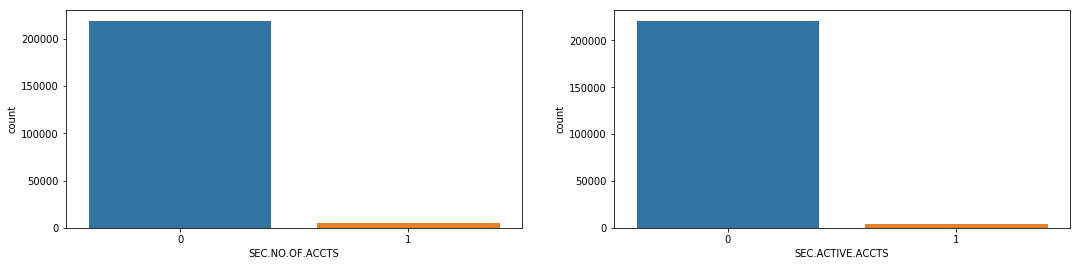

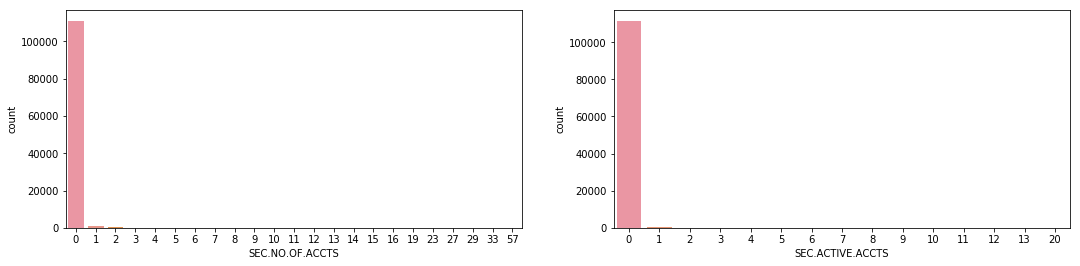

In [113]:
# SEC.NO.OF.ACCTS                2 23 ==> 2
# SEC.ACTIVE.ACCTS               2 15 ==> 2

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.countplot(train_df['SEC.NO.OF.ACCTS'], ax=ax[0])
sns.countplot(train_df['SEC.ACTIVE.ACCTS'], ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.countplot(test_df['SEC.NO.OF.ACCTS'], ax=ax[0])
sns.countplot(test_df['SEC.ACTIVE.ACCTS'], ax=ax[1])

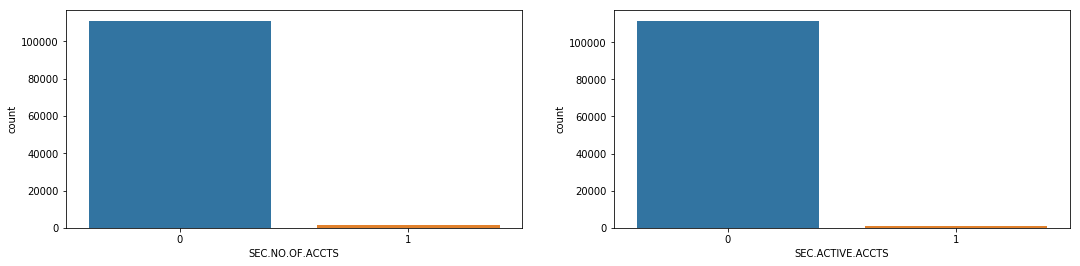

In [117]:
col1 = 'SEC.NO.OF.ACCTS'
col2 = 'SEC.ACTIVE.ACCTS'

use_index = test_df[col1][test_df[col1]>0].index
test_df.loc[use_index, col1] = 1

use_index = test_df[col2][test_df[col2]>0].index
test_df.loc[use_index, col2] = 1

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.countplot(test_df['SEC.NO.OF.ACCTS'], ax=ax[0])
sns.countplot(test_df['SEC.ACTIVE.ACCTS'], ax=ax[1])

In [124]:
count = 0
for col in intersting_cols:
    count += len(set(train_df[col].unique()).union(set(test_df[col].unique())))
print("total cols: ", count)

total cols:  335


In [123]:
# pd.get_dummies(pd.concat([train_df[intersting_cols], test_df[intersting_cols]], 
#                          axis=0).reset_index(drop=True), 
#                columns=intersting_cols, drop_first=True).shape

(336999, 295)

In [152]:
train_df[intersting_cols].shape

(224607, 36)

In [155]:
intersting_cols

['manufacturer_id',
 'Employment.Type',
 'State_ID',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'month_of_birth',
 'credit_hist_year',
 'credit_hist_month',
 'loan_tenure_year',
 'loan_tenure_month',
 'day_of_disbursal',
 'month_of_disbursal',
 'Bureau_desc',
 'no_of_loans',
 'no_of_acc',
 'no_of_acc_overdue',
 'diff_of_acc',
 'negative_income',
 'income_status',
 'credit_history',
 'loan_tenure',
 'ltv_round_cat',
 'no_of_inquiry',
 'state1_max',
 'state1_count',
 'manufac1_max',
 'manufac2_count']

In [153]:
del train_df_save, test_df_save
gc.collect()

1642

In [ ]:
def run_cat_small(train_df, target, depth):
    
    splits = 4
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from catboost import Pool, CatBoostClassifier

    features = train_df.columns
    random_seed = 2019
    
    model = CatBoostClassifier(loss_function         = "Logloss", 
                               eval_metric           = "AUC",
                               random_strength       = 1.5,
                               border_count          = 128,
                               scale_pos_weight      = 3.507,
                               depth                 = depth, 
                               early_stopping_rounds = 50,
                               random_seed           = 1337,
                               task_type             = 'CPU', 
    #                            subsample           = 0.7, 
                               iterations            = 10000, 
                               learning_rate         = 0.09,
                               thread_count          = 4
                              )


    n_split = splits
    kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_seed)

    y_valid_pred = 0 * target
    oof_cat = np.zeros(len(train_df))
    y_test_pred = 0


    for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
        _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)
#         print( "\nFold ", idx)

        fit_model = model.fit(_train, 
                              eval_set=_valid,
                              use_best_model=True,
                              verbose=100
                             )
        pred = fit_model.predict_proba(X_valid)[:,1]
        score = roc_auc_score(y_valid, pred)
        print( "  auc = ", score )
        print("="*60)
        break
    
    cat_imp = pd.DataFrame(data=[fit_model.feature_names_, 
                                 list(fit_model.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    cat_imp = cat_imp.sort_values(by='imp', ascending=False).head(50)
    plt.figure(figsize=(12,15))
    plt.barh(cat_imp.feature, cat_imp.imp)
    plt.show()
    
    return score

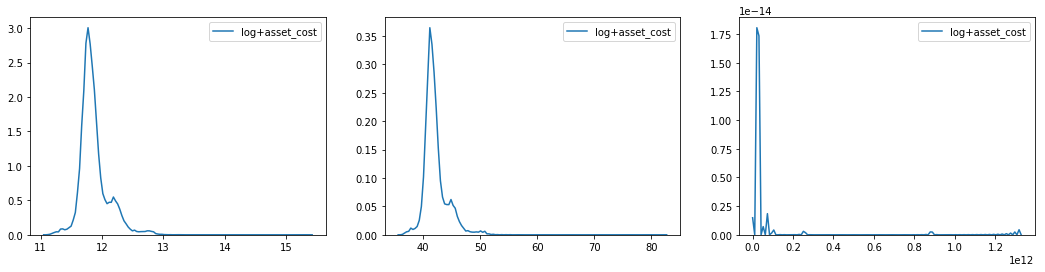

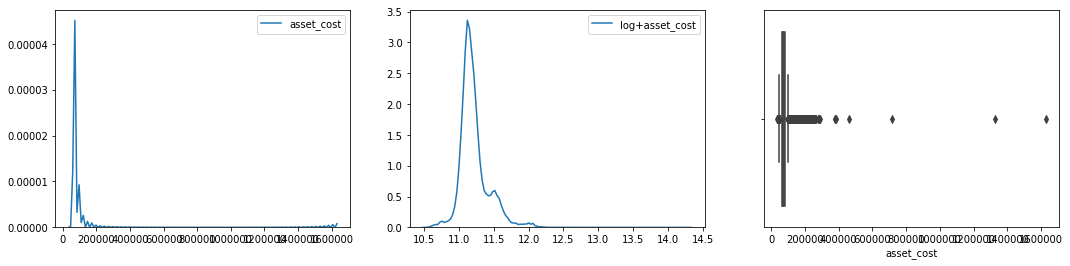

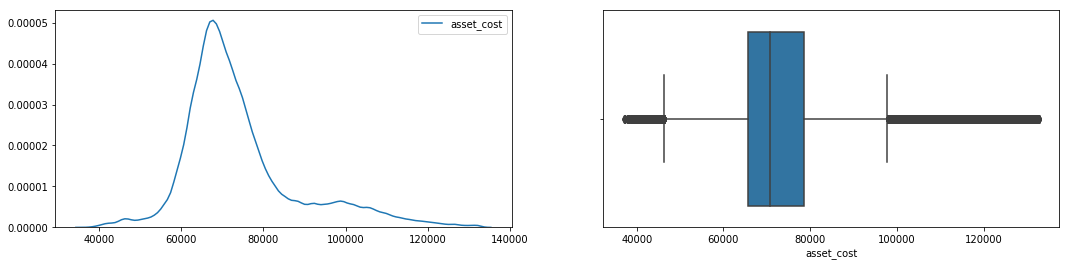

In [60]:
from scipy.stats import boxcox
fig, ax = plt.subplots(1,3,figsize=(18,4))
# sns.kdeplot(train_df[col], ax=ax[0], label=col)
col ='asset_cost'
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.01), ax=ax[0], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=0.2), ax=ax[1], label='log+'+col)
sns.kdeplot(boxcox(train_df[col]+1, lmbda=2), ax=ax[2], label='log+'+col)

# col = 'PRIMARY.INSTAL.AMT'

fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.kdeplot(train_df[col], ax=ax[0], label=col)
sns.kdeplot(np.log(train_df[col]), ax=ax[1], label='log+'+col)
sns.boxplot(train_df[col], ax=ax[2])

fig, ax = plt.subplots(1,2,figsize=(18,4))
tp = train_df[col][(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
sns.kdeplot(tp, ax=ax[0])
sns.boxplot(tp, ax=ax[1])

training data:  (224607, 52) ==> (220383, 52) ==> (218802, 52)
testing data:   (112392, 51) ==> (110247, 51) ==> (109570, 51)


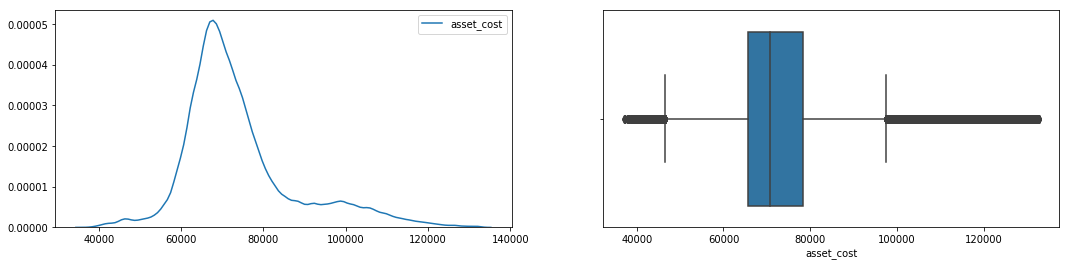

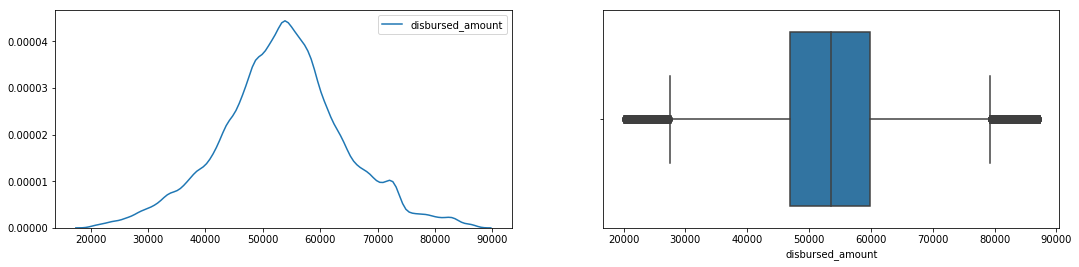

In [3]:
col = 'branch_id'
col1 = 'asset_cost'
col2 = 'disbursed_amount'

col = col1
print("training data: ", train_df.shape,"==>", end=" ")
tp_tr = train_df[(np.abs(stats.zscore(train_df[[col]])) < 3).all(axis=1)]
print(tp_tr.shape, "==>", end=" ")
col = col2
tp_tr = tp_tr[(np.abs(stats.zscore(tp_tr[[col]])) < 3).all(axis=1)]
print(tp_tr.shape)

col = col1
print("testing data:  ", test_df.shape,"==>", end=" ")
tp_ts = test_df[(np.abs(stats.zscore(test_df[[col]])) < 3).all(axis=1)]
print(tp_ts.shape, "==>", end=" ")
col = col2
tp_ts = tp_ts[(np.abs(stats.zscore(tp_ts[[col]])) < 3).all(axis=1)]
print(tp_ts.shape)

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(tp_tr[col1], ax=ax[0])
sns.boxplot(tp_tr[col1], ax=ax[1])

fig, ax = plt.subplots(1,2,figsize=(18,4))
sns.kdeplot(tp_tr[col2], ax=ax[0])
sns.boxplot(tp_tr[col2], ax=ax[1])

In [128]:
def run_lgb(splits, file_path, train_df, target, test_df, test_id, sub, leaves):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    import lightgbm as lgb
    from sklearn.metrics import roc_auc_score

#     file_path = 'baseline3'
#     splits = 4
    random_seed = 2019
    features = train_df.columns
    param = {
        'bagging_freq'           : 5,
        'bagging_fraction'       : 0.33,
        'boost_from_average'     : 'false',
        'boost'                  : 'gbdt',
        'feature_fraction'       : 0.3,
        'learning_rate'          : 0.01,
        'max_depth'              : -1,
        'metric'                 : 'auc',
        'min_data_in_leaf'       : 100,
        'min_sum_hessian_in_leaf': 10.0,
        'num_leaves'             : leaves,
        'num_threads'            : 4,
        'tree_learner'           : 'serial',
        'objective'              : 'binary',
        'verbosity'              : 1,
    #     'lambda_l1'              : 0.001,
        'lambda_l2'              : 0.05
    }   

    n_splits = splits
    num_round = 10000
    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_lgb = np.zeros(len(train_df))
    predictions = np.zeros(len(test_df))

    temp = train_df.apply(lambda x: pd.Series.value_counts(x).shape[0])
    cat_columns = list(temp[temp<50].index)

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
        print(trn_idx.shape, val_idx.shape)
        print("Fold {}".format(fold_))
        trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx],
                              feature_name=list(train_df.columns))#,
    #                           categorical_feature=cat_columns)

        val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx],
                              feature_name=list(train_df.columns))#,
    #                           categorical_feature=cat_columns) 

        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], 
                        verbose_eval=200, early_stopping_rounds = 25)
        oof_lgb[val_idx] = clf.predict(train_df.iloc[val_idx][features], 
                                   num_iteration=clf.best_iteration)
        predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

        print( "  auc = ", roc_auc_score(target.iloc[val_idx], oof_lgb[val_idx]) )
        print("="*60)

#         break
    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_lgb)))

    sub_df = pd.DataFrame({"ID_code":test_id})
    sub_df["target"] = predictions

    sub_df.columns = sub.columns
    sub_df.to_csv('submission/lightgbm_target_{}.csv'.format(file_path), index=None)


    lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
    lgb_imp.columns = ['feature','imp']
    lgb_imp = lgb_imp.sort_values(by='imp', ascending=False)
    plt.figure(figsize=(12,15))
    plt.barh(lgb_imp.feature, lgb_imp.imp)
    plt.show()
    
    return clf, lgb_imp.head(50)

In [118]:
def run_cat(splits, file_path, train_df, target, test_df, test_id, sub, depth):
    
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from catboost import Pool, CatBoostClassifier
    import catboost

    features = train_df.columns
    random_seed = 2019
    
    model = CatBoostClassifier(loss_function         = "Logloss", 
                               eval_metric           = "AUC",
                               random_strength       = 1.5,
                               border_count          = 128,
                               scale_pos_weight      = 3.507,
                               depth                 = depth, 
                               early_stopping_rounds = 50,
                               random_seed           = 1337,
                               task_type             = 'CPU', 
    #                            subsample           = 0.7, 
                               iterations            = 10000, 
                               learning_rate         = 0.09,
                               thread_count          = 4
                              )


    n_split = splits
    kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_seed)

    y_valid_pred = 0 * target
    oof_cat = np.zeros(len(train_df))
    y_test_pred = 0


    for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
        _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)
        print( "\nFold ", idx)

        fit_model = model.fit(_train, 
                              eval_set=_valid,
                              use_best_model=True,
                              verbose=100
                             )
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  auc = ", roc_auc_score(y_valid, pred) )

        try:
            y_valid_pred.iloc[valid_index] = pred
        except:
            y_valid_pred.iloc[valid_index] = pred.reshape(-1,1)

        y_test_pred += fit_model.predict_proba(test_df)[:,1]

        oof_cat[valid_index] = fit_model.predict_proba(train_df.iloc[valid_index][features])[:,1]

        print("="*60)

    y_test_pred /= n_split


    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_cat)))
    sub_df = pd.DataFrame({"ID_code":test_id})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)


    cat_imp = pd.DataFrame(data=[fit_model.feature_names_, list(fit_model.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    cat_imp = cat_imp.sort_values(by='imp', ascending=False).head(50)
    plt.figure(figsize=(12,15))
    plt.barh(cat_imp.feature, cat_imp.imp)
    plt.show()
    
    return fit_model, cat_imp

In [129]:
def run_xgb(splits, file_path, train_df, target, test_df, test_id, sub, depth):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    import xgboost as xgb

    features = train_df.columns
    params = {
        'eval_metric'     : 'auc',
        'seed'            : 1337,
        'eta'             : 0.05,
        'subsample'       : 0.7,
        'colsample_bytree': 0.5,
        'silent'          : 1,
        'nthread'         : 4,
        'Scale_pos_weight': 3.607,
        'objective'       : 'binary:logistic',
        'max_depth'       : depth,
        'alpha'           : 0.05
    }

    random_seed = 2019
    n_splits = splits
    verbose_eval = 200
    early_stop = 50
    num_rounds = 10000


    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    test_pred = np.zeros((len(test_df),n_splits))

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
        print("Fold {}".format(fold_))

        d_train = xgb.DMatrix( data          = train_df.iloc[trn_idx][features], 
                               label         = target.iloc[trn_idx], 
                               feature_names = train_df.columns)
        d_valid = xgb.DMatrix( data          = train_df.iloc[val_idx][features], 
                               label         = target.iloc[val_idx], 
                               feature_names = train_df.columns)

        watchlist = [(d_valid, 'valid')]
        model = xgb.train(dtrain=d_train, num_boost_round=num_rounds, 
                          evals=watchlist,
                          early_stopping_rounds=early_stop, 
                          verbose_eval=verbose_eval, params=params)

        valid_pred = model.predict(xgb.DMatrix(train_df.iloc[val_idx][features], 
                                               feature_names=train_df.columns), 
                                   ntree_limit=model.best_ntree_limit)



        test_pred[:,fold_] = model.predict(xgb.DMatrix(test_df[features], 
                                                       feature_names=train_df.columns), 
                                          ntree_limit=model.best_ntree_limit)

        oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred

#         break

    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

    sub_df = pd.DataFrame({"id":test_id})
    sub_df["target"] = test_pred.mean(axis=1)
    sub_df.columns = sub.columns
    
    sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

    sub_df.head()

    xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
    xgb_imp.columns = ['feature','imp']
    xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
    plt.figure(figsize=(12,15))
    plt.barh(xgb_imp.feature, xgb_imp.imp)

    return model, xgb_imp

In [22]:
train_df_save1 = train_df.copy()
test_df_save1  = test_df.copy()

train_df.drop(['UniqueID','loan_default'], axis=1, inplace=True)
test_df.drop('UniqueID', axis=1, inplace=True)

train_df.reset_index(drop=True, inplace=True)
target = train_df_save1.loan_default
test_id = test_df_save1.UniqueID

train_df_save1.shape, train_df.shape

((224607, 142), (224607, 140))


Fold  0
0:	test: 0.5973679	best: 0.5973679 (0)	total: 96.8ms	remaining: 16m 7s
100:	test: 0.6634901	best: 0.6634901 (100)	total: 12.2s	remaining: 20m
200:	test: 0.6707031	best: 0.6707031 (200)	total: 26.3s	remaining: 21m 23s
300:	test: 0.6737823	best: 0.6737823 (300)	total: 39.9s	remaining: 21m 26s
400:	test: 0.6751633	best: 0.6751639 (397)	total: 54.8s	remaining: 21m 52s
500:	test: 0.6759249	best: 0.6759249 (500)	total: 1m 9s	remaining: 21m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6760217245
bestIteration = 504

Shrink model to first 505 iterations.
  auc =  0.676021724477782

Fold  1
0:	test: 0.6108827	best: 0.6108827 (0)	total: 165ms	remaining: 27m 25s
100:	test: 0.6648952	best: 0.6648952 (100)	total: 13.9s	remaining: 22m 46s
200:	test: 0.6712619	best: 0.6712660 (199)	total: 25.8s	remaining: 20m 55s
300:	test: 0.6731151	best: 0.6731333 (297)	total: 37.1s	remaining: 19m 56s
400:	test: 0.6742014	best: 0.6742014 (400)	total: 51.4s	remaining: 20m 29s
Stop

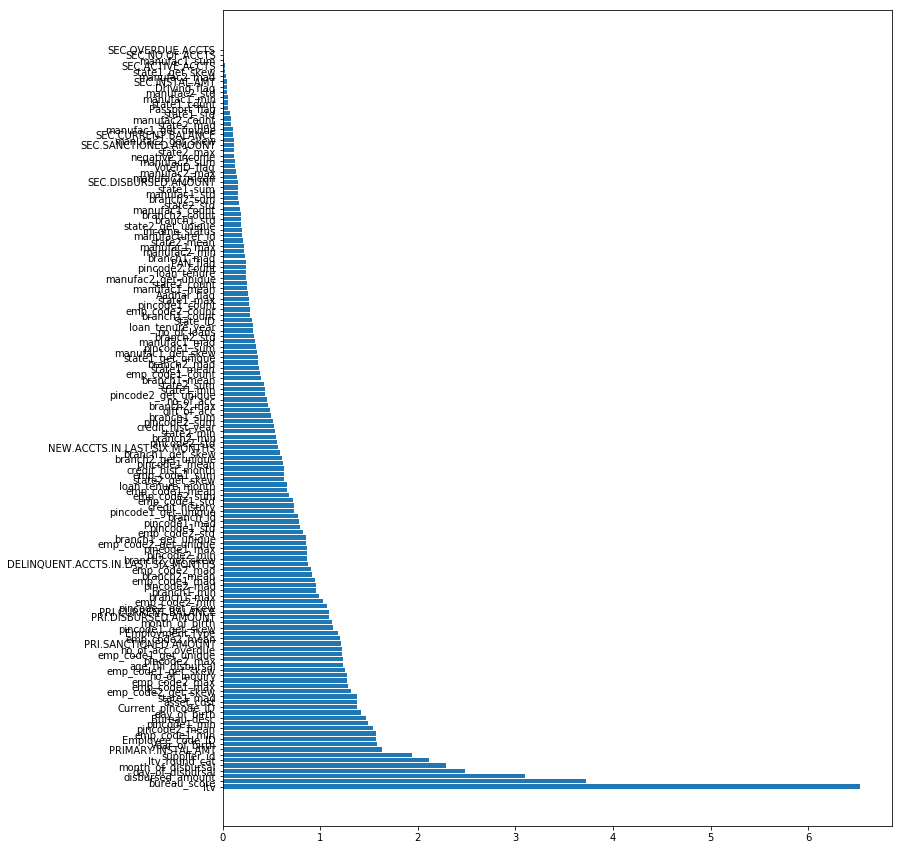

In [30]:
# run_lgb(3, 'feat1', train_df, target, test_df, test_id, sub)
cat_model1, cat_imp1 = run_cat(3, 'feat_cat1', train_df, target, test_df, test_id, sub, 6)


<BarContainer object of 50 artists>

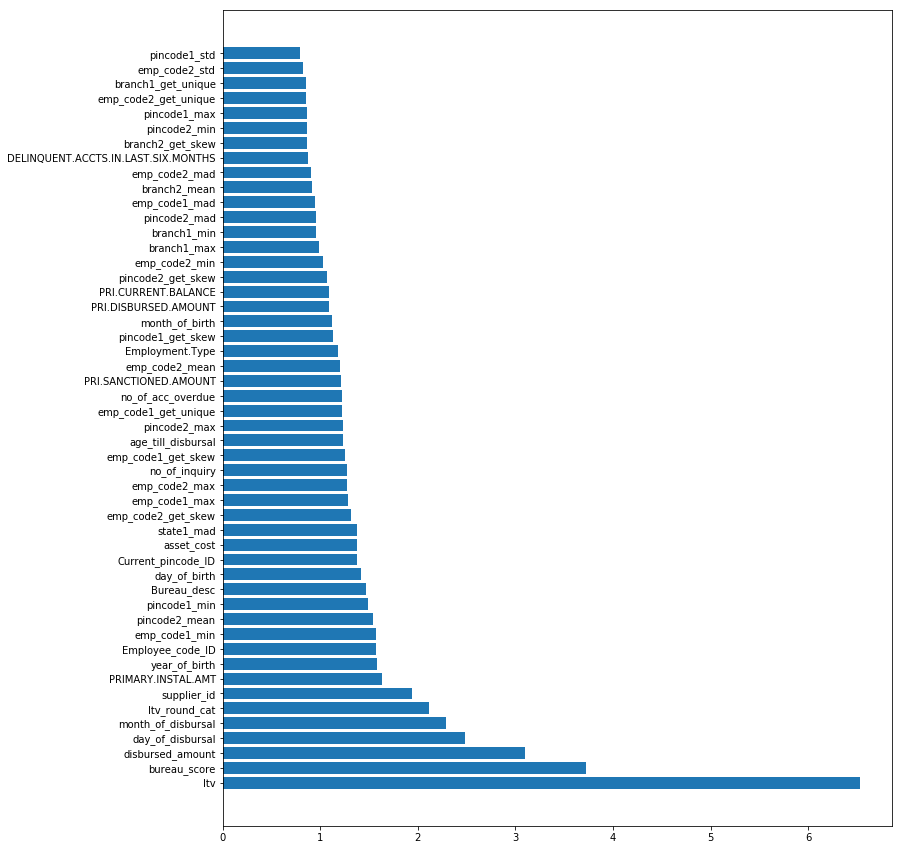

In [33]:
plt.figure(figsize=(12,15))
plt.barh(cat_imp1.feature, cat_imp1.imp)


In [34]:
import shap
shap.initjs()


In [36]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2019)
for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
    _, y_valid = target.iloc[train_index], target.iloc[valid_index]
    _, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]

/home/ankish/anaconda3/lib/python3.6/site-packages/catboost/core.py:1643: UserWarning: fstr_type soon be deprecated, use type instead
  warnings.warn("fstr_type soon be deprecated, use type instead")


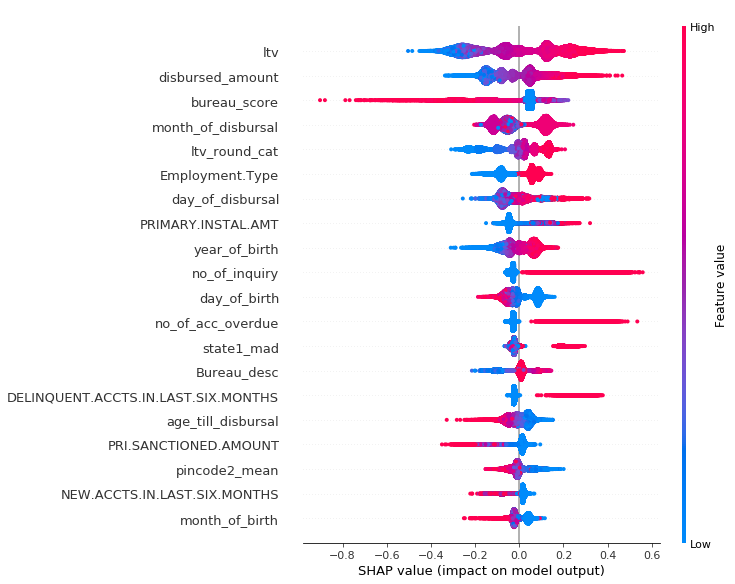

In [37]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(cat_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)
# shap.summary_plot(shap_values, X, plot_type="bar")


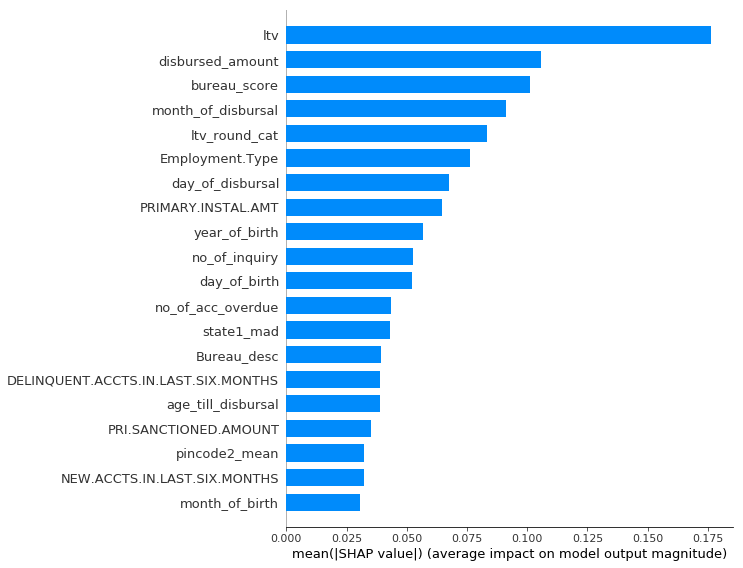

In [38]:
shap.summary_plot(shap_values, X_valid, plot_type="bar")


(149737,) (74870,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.691855	valid_1's auc: 0.664703
[400]	training's auc: 0.711697	valid_1's auc: 0.670993
[600]	training's auc: 0.728885	valid_1's auc: 0.674853
[800]	training's auc: 0.743966	valid_1's auc: 0.677271
[1000]	training's auc: 0.757164	valid_1's auc: 0.678555
[1200]	training's auc: 0.769127	valid_1's auc: 0.679395
Early stopping, best iteration is:
[1280]	training's auc: 0.773755	valid_1's auc: 0.679493
  auc =  0.6794925203305826


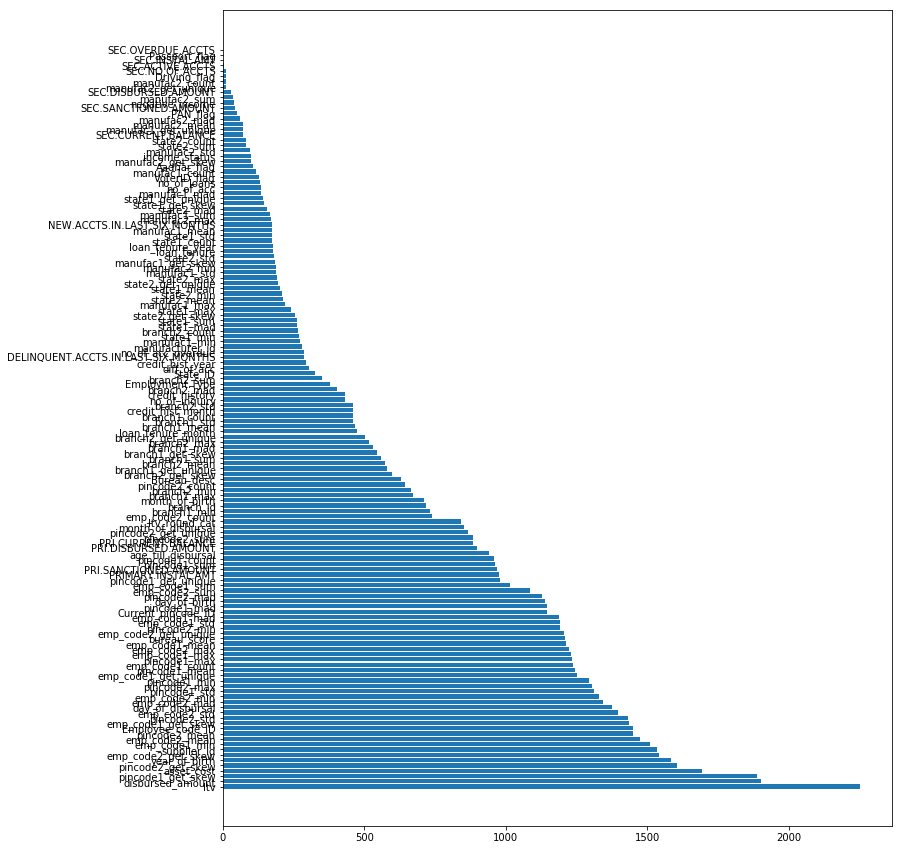

In [46]:
lgb_model1, lgb_imp1 = run_lgb(3, 'feat_lgb1', train_df, target, test_df, test_id, sub, 70)


In [ ]:
# kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2019)

# for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
#     y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
#     X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:] 
#     break
    

In [108]:
def run_rf(splits, file_path, train_df, target, test_df, test_id, sub, depth, estimators):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


    features = train_df.columns
    
    random_seed  = 2019
    n_splits     = splits
    verbose_eval = 200
    early_stop   = 50
    num_rounds   = 10000


    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    test_pred = np.zeros((len(test_df),n_splits))

    for idx, (train_index, valid_index) in enumerate(kf.split(train_df, target)):
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:] 
        
        clf = RandomForestClassifier(
                                n_estimators = estimators, 
                                criterion = 'gini', 
                                max_depth = depth, 
                                # min_samples_split = 2, 
                                # min_samples_leaf = 1, 
                                # min_weight_fraction_leaf = 0.0, 
                                max_features = 'auto', 
                                # max_leaf_nodes = None, 
                                # min_impurity_decrease = 0.0, 
                                bootstrap = True, 
                                oob_score = True, 
                                n_jobs = 4, 
                                random_state = 1337, 
                                verbose = 1, 
                                class_weight = 'balanced')#3.607)
        clf.fit(X_train, y_train)
#         valid_pred = clf.predict(X_valid)
#         print("CV score: {:<8.5f}".format(roc_auc_score(X_valid, valid_pred)))
        
        valid_pred = clf.predict_proba(X_valid)[:,1]
        print("CV score: {:<8.5f}".format(roc_auc_score(y_valid, valid_pred)))
#         test_pred = clf.predict()
#         oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred

        break

#     print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

#     sub_df = pd.DataFrame({"id":ts_ids})
#     sub_df["target"] = test_pred.mean(axis=1)
#     # sub_df.target = np.where(sub_df.target>0.5,1,0)

#     sub_df.columns = sub.columns
#     sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

#     sub_df.head()

#     xgb_imp = pd.DataFrame(data=[list(model.get_fscore().keys()), list(model.get_fscore().values())]).T
#     xgb_imp.columns = ['feature','imp']
#     xgb_imp = xgb_imp.sort_values(by='imp', ascending=False)
#     plt.figure(figsize=(12,15))
#     plt.barh(xgb_imp.feature, xgb_imp.imp)

    return clf#, xgb_imp

In [81]:
rf_model1 = run_rf(3, 'feat_rf1', train_df.fillna(0), target, test_df.fillna(0), test_id, sub, 6)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   49.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   55.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.7s


CV score: 0.64665 


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.0s finished


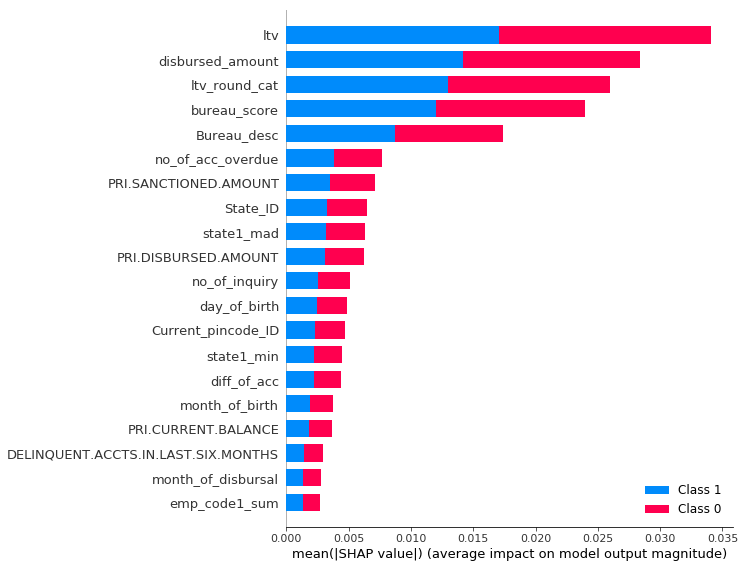

In [82]:
explainer = shap.TreeExplainer(rf_model1)
shap_values = explainer.shap_values(X_valid)
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid)


In [84]:
cor = train_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
# cor[(cor > 0.1) | (cor < -0.1)]


In [101]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
#     y = x['loss']
#     x = x.drop(columns = ['loss'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
#     x = x.drop(columns = drops)
    
    # Add the score back in to the data
#     x['loss'] = y
               
    return drops

In [102]:
drop_cols = remove_collinear_features(train_df, 0.5)
len(drop_cols)

90

In [113]:
# 0.64048 == depth=6
rf_model2 = run_rf(3, 'feat_rf1', train_df.drop(list(drop_cols), axis=1).fillna(0), 
                   target, test_df.drop(list(drop_cols), axis=1).fillna(0), test_id, 
                   sub, 5, 1000)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   59.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.2s


CV score: 0.63608 


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


In [114]:
np.argmax(rf_model2.feature_importances_), train_df.columns[2]

(2, 'ltv')

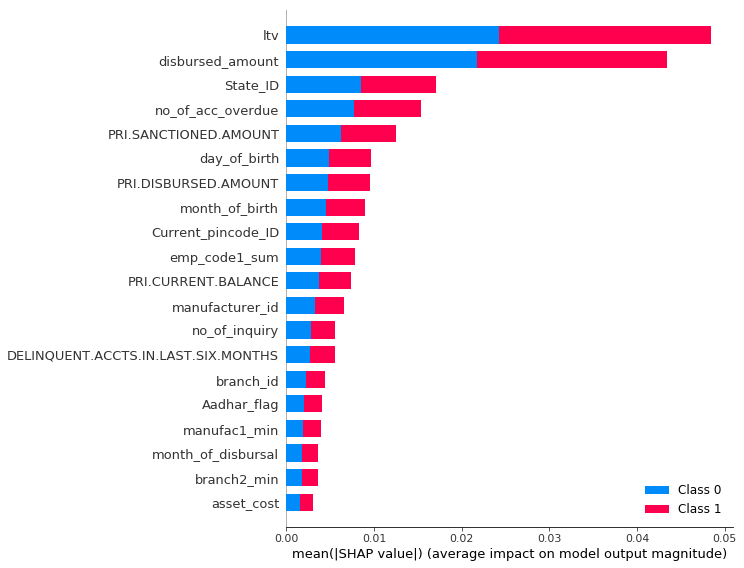

In [117]:
explainer = shap.TreeExplainer(rf_model2)
shap_values = explainer.shap_values(X_valid.drop(list(drop_cols), axis=1))
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid.drop(list(drop_cols), axis=1))



Fold  0
0:	test: 0.5936610	best: 0.5936610 (0)	total: 65.2ms	remaining: 10m 51s
100:	test: 0.6543466	best: 0.6543466 (100)	total: 9.05s	remaining: 14m 47s
200:	test: 0.6611572	best: 0.6611572 (200)	total: 17.2s	remaining: 13m 59s
300:	test: 0.6640883	best: 0.6640883 (300)	total: 26.1s	remaining: 14m 1s
400:	test: 0.6662472	best: 0.6662666 (397)	total: 35s	remaining: 13m 58s
500:	test: 0.6675187	best: 0.6675187 (500)	total: 43.1s	remaining: 13m 37s
600:	test: 0.6684336	best: 0.6684346 (599)	total: 51.2s	remaining: 13m 20s
700:	test: 0.6690821	best: 0.6690943 (699)	total: 59.1s	remaining: 13m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6690942721
bestIteration = 699

Shrink model to first 700 iterations.
  auc =  0.6690942721166875

Fold  1
0:	test: 0.5939369	best: 0.5939369 (0)	total: 81.2ms	remaining: 13m 32s
100:	test: 0.6567871	best: 0.6567871 (100)	total: 9.66s	remaining: 15m 46s
200:	test: 0.6632393	best: 0.6632393 (200)	total: 19.3s	remaining: 15m 42s
3

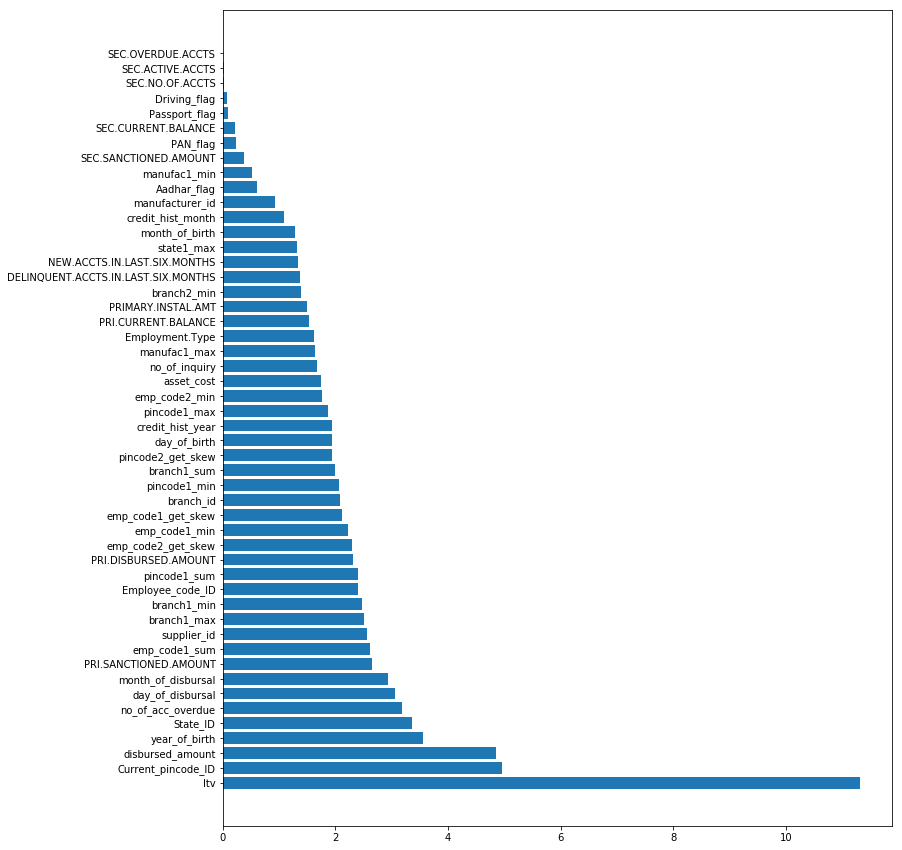

In [119]:
cat_model2, cat_imp2 = run_cat(3, 'feat_cat2', train_df.drop(list(drop_cols), axis=1), 
                               target, test_df.drop(list(drop_cols), axis=1), test_id, 
                               sub, 5)


/home/ankish/anaconda3/lib/python3.6/site-packages/catboost/core.py:1643: UserWarning: fstr_type soon be deprecated, use type instead
  warnings.warn("fstr_type soon be deprecated, use type instead")


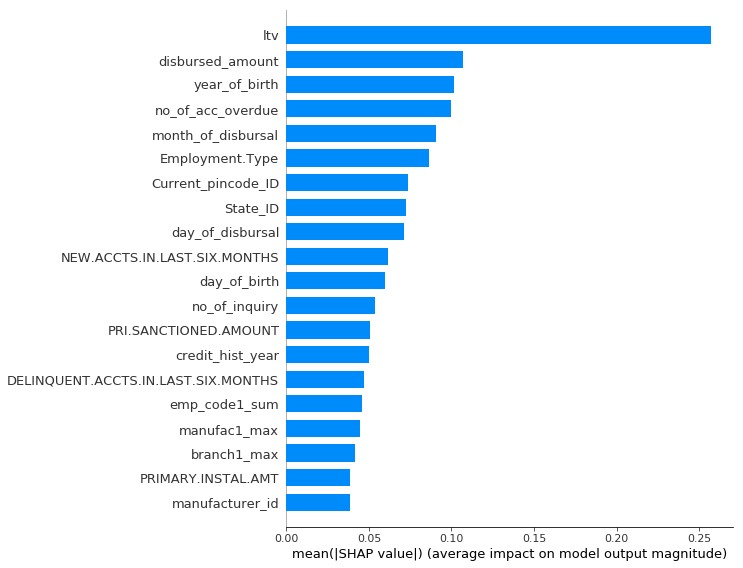

In [120]:
explainer = shap.TreeExplainer(cat_model2)
shap_values = explainer.shap_values(X_valid.drop(list(drop_cols), axis=1))
# shap.dependence_plot("RM", shap_values, X_valid)
shap.summary_plot(shap_values, X_valid.drop(list(drop_cols), axis=1), plot_type="bar")


(149737,) (74870,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.691855	valid_1's auc: 0.664703
[400]	training's auc: 0.711697	valid_1's auc: 0.670993
[600]	training's auc: 0.728885	valid_1's auc: 0.674853
[800]	training's auc: 0.743966	valid_1's auc: 0.677271
[1000]	training's auc: 0.757164	valid_1's auc: 0.678555
[1200]	training's auc: 0.769127	valid_1's auc: 0.679395
Early stopping, best iteration is:
[1280]	training's auc: 0.773755	valid_1's auc: 0.679493
  auc =  0.6794925203305826
(149738,) (74869,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's auc: 0.692655	valid_1's auc: 0.664589
[400]	training's auc: 0.713131	valid_1's auc: 0.671206
[600]	training's auc: 0.730662	valid_1's auc: 0.674577
[800]	training's auc: 0.74589	valid_1's auc: 0.676058
[1000]	training's auc: 0.759364	valid_1's auc: 0.676788
Early stopping, best iteration is:
[1010]	training's auc: 0.760053	valid_1's auc: 0.67689
  auc = 

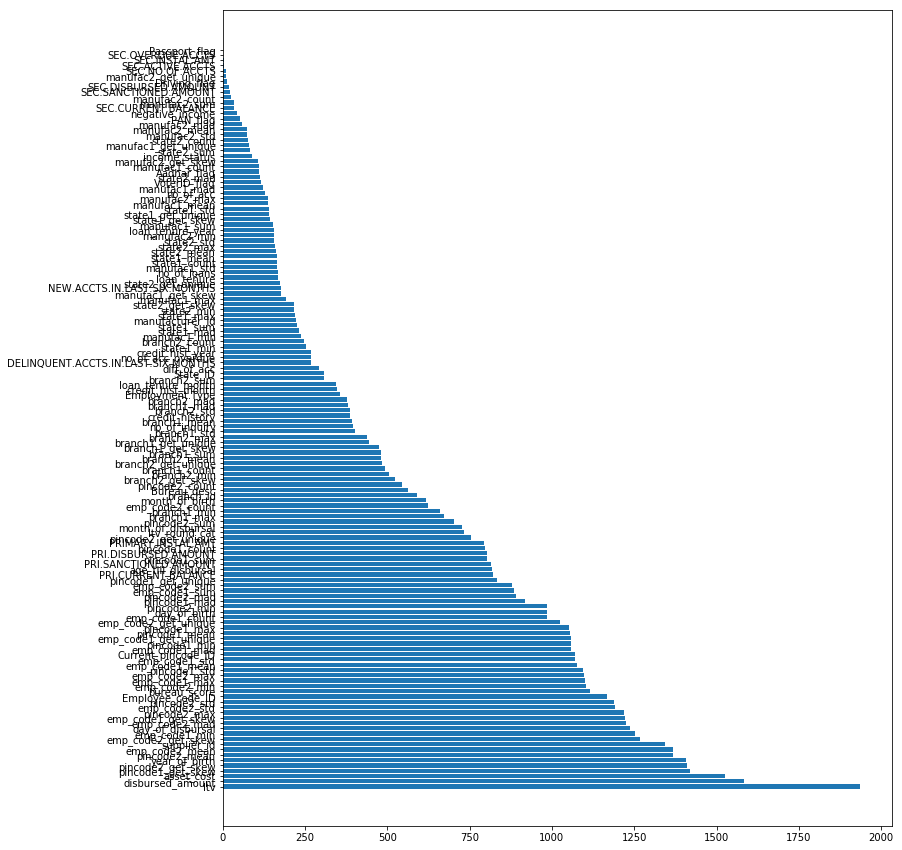

In [130]:
lgb_model2, lgb_imp2 = run_lgb(3, 'feat_lgb2', train_df, target, test_df, 
                               test_id, sub, 70)


In [131]:
xgb_model2, xgb_imp2 = run_xgb(3, 'feat_xgb2', train_df, target, 
                               test_df, test_id, sub, 6)


Fold 0
[0]	valid-auc:0.620143
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.674375
[400]	valid-auc:0.67733
Stopping. Best iteration:
[433]	valid-auc:0.677452

Fold 1
[0]	valid-auc:0.610164
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.673632
[400]	valid-auc:0.674465
Stopping. Best iteration:
[368]	valid-auc:0.674756

Fold 2
[0]	valid-auc:0.616579
Will train until valid-auc hasn't improved in 50 rounds.
[200]	valid-auc:0.669831
[400]	valid-auc:0.671814
Stopping. Best iteration:
[396]	valid-auc:0.671903

CV score: 0.67470 


NameError: name 'ts_ids' is not defined

In [ ]:
lgb_model22, lgb_imp22 = run_lgb(3, 'feat_lgb22', train_df.drop(list(drop_cols), axis=1), 
                                 target, test_df.drop(list(drop_cols), axis=1), 
                                 test_id, sub, 30)


In [ ]:
xgb_model22, xgb_imp22 = run_xgb(3, 'feat_xgb22', train_df.drop(list(drop_cols), axis=1), 
                                 target, test_df.drop(list(drop_cols), axis=1), 
                                 test_id, sub, 5)


In [ ]:
xgb_model222, xgb_imp222 = run_xgb(3, 'feat_xgb222', train_df.drop(list(drop_cols), axis=1), 
                                   target, test_df.drop(list(drop_cols), axis=1), 
                                   test_id, sub, 4)


In [145]:
train_df_save1.to_csv('store_data/train_df_save3.csv',index=None)
test_df_save1.to_csv('store_data/test_df_save3.csv',index=None)


In [139]:
train_df.drop(list(drop_cols), axis=1).columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'Aadhar_flag', 'PAN_flag', 'Driving_flag',
       'Passport_flag', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'day_of_birth', 'month_of_birth',
       'year_of_birth', 'credit_hist_year', 'credit_hist_month',
       'day_of_disbursal', 'month_of_disbursal', 'no_of_acc_overdue',
       'no_of_inquiry', 'branch1_min', 'branch1_max', 'branch1_sum',
       'branch2_min', 'state1_max', 'emp_code1_min', 'emp_code1_sum',
       'emp_code1_get_skew', 'emp_code2_min', 'emp_code2_get_skew',
       'pincode1_min', 'pincode1_max', 'pincode1_sum', 'pincode2_get_skew'

In [146]:
cols_for_pca = [col for col in list(drop_cols) if col.startswith('branch') or \
                col.startswith('state') or col.startswith('emp_code') or \
                col.startswith('manufac') or col.startswith('pincode')]
# pca_tr = train_df[cols_for_pca]
# pca_ts = test_df[cols_for_pca]


In [147]:
!ls submission/

catboost_feat_cat1.csv	       lightgbm_target_baseline2.zip
catboost_feat_cat2.csv	       lightgbm_target_baseline3.csv
check.zip		       lightgbm_target_baseline3.zip
lightgbm_target_baseline1.csv  lightgbm_target_baseline.csv
lightgbm_target_baseline1.zip  lightgbm_target_feat_lgb2.csv
lightgbm_target_baseline2.csv


In [148]:
!zip submission/catboost_feat_cat1.zip submission/catboost_feat_cat1.csv
!zip submission/catboost_feat_cat2.zip submission/catboost_feat_cat2.csv

  adding: submission/catboost_feat_cat1.csv (deflated 54%)
  adding: submission/catboost_feat_cat2.csv (deflated 54%)
